In [1]:
import numpy as np 
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns

mvz = pd.read_excel("Agg_Moovizy_V3.xlsx", index_col = 0)

modif_1 = mvz[['Date', 'Interval', 'Req', 'Req_2H', 'Req_1D', 'Req_DP',
       'TopSpeed (m/s)', 'Num_Transfer', 'Weekend', 'Day',
       'Total Ticket Sales ', 'Regular User ', 'Irregular Users']]

dt_mvz = modif_1.rename(columns={'TopSpeed (m/s)':'TopSpeed',
                        'Total Ticket Sales ':'Ticket_Sales',
                        'Regular User ':'Regular_Sales',
                        'Irregular Users':'Irregular_Sales'})

In [2]:
idx = dt_mvz.TopSpeed != np.inf
noinf = dt_mvz[idx]
noinf_mean = np.mean(noinf.TopSpeed)

dt_mvz.replace([np.inf, -np.inf], noinf_mean, inplace=True)

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


model = smf.ols('Ticket_Sales ~ Req_2H + Req_1D + Req_DP + TopSpeed + Num_Transfer + C(Weekend):C(Interval)',
                  data=dt_mvz)
results = model.fit(cov_type='HC3') # heteroscedasticity robust covariance
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Ticket_Sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     75.55
Date:                Sun, 18 Apr 2021   Prob (F-statistic):          2.76e-190
Time:                        01:21:13   Log-Likelihood:                -1442.2
No. Observations:                 504   AIC:                             2990.
Df Residuals:                     451   BIC:                             3214.
Df Model:                          52                                         
Covariance Type:                  HC3                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [4]:
results.params[-5:] # Type = pd.Series

Req_2H          0.021883
Req_1D         -0.019557
Req_DP         -0.006463
TopSpeed       -0.347833
Num_Transfer   -2.335302
dtype: float64

In [5]:
results.rsquared

0.8998953719844398

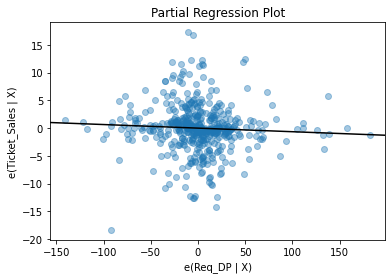

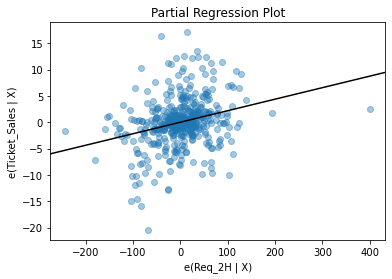

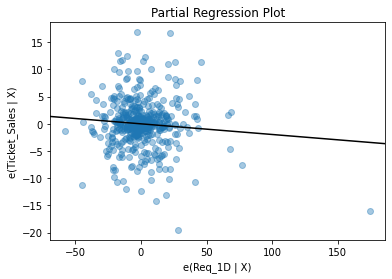

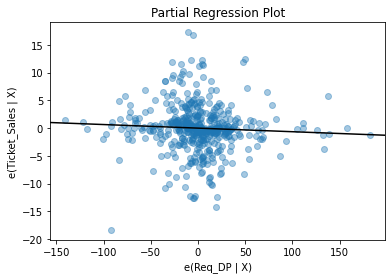

In [6]:
sm.graphics.plot_partregress(endog='Ticket_Sales', exog_i='Req_2H',
                             exog_others=['Req_1D', 'Req_DP', 'TopSpeed', 'Num_Transfer', 'C(Weekend):C(Interval)'],
                             alpha=.4, data=dt_mvz, obs_labels=False)

sm.graphics.plot_partregress(endog='Ticket_Sales', exog_i='Req_1D',
                             exog_others=['Req_2H', 'Req_DP', 'TopSpeed', 'Num_Transfer', 'C(Weekend):C(Interval)'],
                             alpha=.4, data=dt_mvz, obs_labels=False)

sm.graphics.plot_partregress(endog='Ticket_Sales', exog_i='Req_DP',
                             exog_others=['Req_2H', 'Req_1D', 'TopSpeed', 'Num_Transfer', 'C(Weekend):C(Interval)'],
                             alpha=.4, data=dt_mvz, obs_labels=False)